In [1]:
%matplotlib inline
import pandas as pd
import datetime

In [2]:
df = pd.read_csv('data.csv', skiprows=1, skipfooter=1, header=None, engine='python')


In [3]:
df.columns = ['HDF', 'date', 'half_hour_increment',
              'CCGT', 'OIL', 'COAL', 'NUCLEAR',
              'WIND', 'PS', 'NPSHYD', 'OCGT',
              'OTHER', 'INTFR', 'INTIRL', 'INTNED',
               'INTEW', 'BIOMASS', 'INTEM','INTEL',
               'INTIFA2', 'INTNSL']
df.head()


,HDF,date,half_hour_increment,CCGT,OIL,COAL,NUCLEAR,WIND,PS,NPSHYD,...,OTHER,INTFR,INTIRL,INTNED,INTEW,BIOMASS,INTEM,INTEL,INTIFA2,INTNSL
0,FUELHH,20200101,1,7912,0,670,6953,5004,0,672,...,130,1704,0,854,0,2353,854,0,0,0
1,FUELHH,20200101,2,8420,0,670,6949,5043,0,669,...,123,1704,0,852,0,2358,854,0,0,0
2,FUELHH,20200101,3,8037,0,670,6952,5030,0,662,...,122,1704,0,852,0,2356,854,0,0,0
3,FUELHH,20200101,4,7499,0,670,6948,4825,0,591,...,122,1704,0,852,0,2343,854,0,0,0
4,FUELHH,20200101,5,7020,0,669,6954,4689,0,548,...,121,1704,0,852,0,2356,854,0,0,0


In [4]:
df['datetime'] = pd.to_datetime(df['date'], format="%Y%m%d")
df['datetime'] = df.apply(lambda x:x['datetime']+ datetime.timedelta(minutes=30*(int(x['half_hour_increment'])-1)), axis = 1)


<AxesSubplot:xlabel='datetime'>

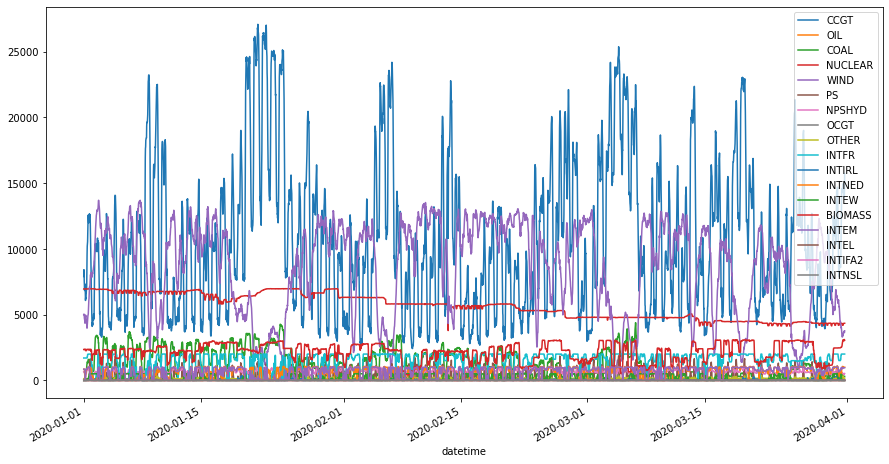

In [5]:
df.drop(
    ['HDF', 'date', 'half_hour_increment'], axis = 1
    ).set_index('datetime').plot(figsize=(15,8))


In [ ]:
!pip install -q --user "convertdate" "holidays" "lunarcalendar" "pystan==2.19.1.1" "prophet"


In [ ]:
df_for_prophet = df[['datetime', 'CCGT']].rename(columns = {'datetime':'ds', 'CCGT':'y'})


In [ ]:
X = df_for_prophet.copy()
y = df_for_prophet['y']
proportion_in_training = 0.8
split_index = int(proportion_in_training*len(y))
X_train, y_train = X.iloc[:split_index], y.iloc[:split_index]
X_test, y_test = X.iloc[split_index:], y.iloc[split_index:]


In [ ]:
from prophet import Prophet
m = Prophet()
m.fit(X_train)
